### Analysis of fatal police shootings

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
#data = pd.read_csv('fatal-police-shootings-data.csv')
data = pd.read_csv('https://raw.githubusercontent.com/washingtonpost/data-police-shootings/master/fatal-police-shootings-data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3882 entries, 0 to 3881
Data columns (total 14 columns):
id                         3882 non-null int64
name                       3882 non-null object
date                       3882 non-null object
manner_of_death            3882 non-null object
armed                      3633 non-null object
age                        3742 non-null float64
gender                     3879 non-null object
race                       3538 non-null object
city                       3882 non-null object
state                      3882 non-null object
signs_of_mental_illness    3882 non-null bool
threat_level               3882 non-null object
flee                       3746 non-null object
body_camera                3882 non-null bool
dtypes: bool(2), float64(1), int64(1), object(10)
memory usage: 371.6+ KB


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3844 entries, 0 to 3843
Data columns (total 14 columns):
id                         3844 non-null int64
name                       3844 non-null object
date                       3844 non-null object
manner_of_death            3844 non-null object
armed                      3596 non-null object
age                        3702 non-null float64
gender                     3841 non-null object
race                       3501 non-null object
city                       3844 non-null object
state                      3844 non-null object
signs_of_mental_illness    3844 non-null bool
threat_level               3844 non-null object
flee                       3708 non-null object
body_camera                3844 non-null bool
dtypes: bool(2), float64(1), int64(1), object(10)
memory usage: 368.0+ KB


In [4]:
data.describe()

,id,age
count,3882.000000,3742.000000
mean,2176.480938,36.846606
std,1215.864705,13.092498
min,3.000000,6.000000
25%,1125.250000,27.000000
50%,2167.500000,35.000000
75%,3229.750000,45.000000
max,4279.000000,91.000000


This tells us that most of the data in this dataset is categorical, and will need to be converted to numerical values to be useful.
First, lets break the date into year, month and day columns:

In [10]:
dateUhFrame = data['date'].str.split('-',expand=True)
data['year'] = dateUhFrame[0]
data['month'] = dateUhFrame[1]
data['day'] = dateUhFrame[2]

#data['year'] = data['date'].str.split('-',expand=True)[0]
#data['month'] = data['date'].str.split('-',expand=True)[1]
#data['day'] = data['date'].str.split('-',expand=True)[2]

In [17]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,month,day
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,2015,01,02
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,2015,01,02
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,2015,01,03
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,2015,01,04
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,2015,01,04


What does the data look like from year to year?

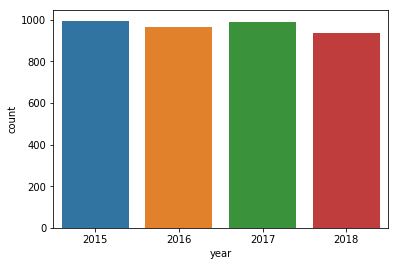

In [11]:
sns.countplot(data=data,x='year')

How about from month to month over the years?

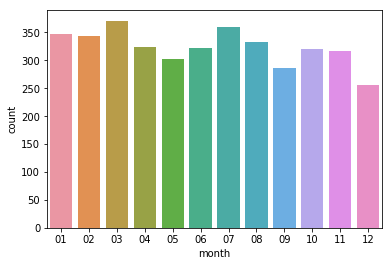

In [12]:
sns.countplot(data=data,x='month')

But how consistent is the monthly data from year to year? Is one month consistently higher or lower?

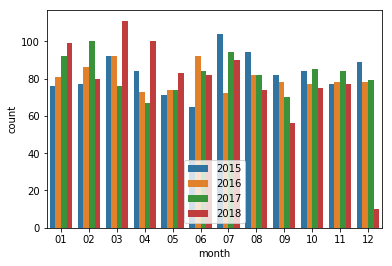

In [13]:
sns.countplot(data=data,x='month', hue='year')
plt.legend(loc='lower center')

Maybe it would be easier to see the monthly data for each year:

Text(0.5,1,'2018')

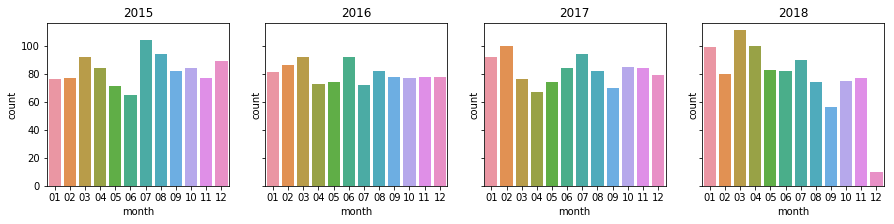

In [14]:
df15 = data[data['year']=='2015']
df16 = data[data['year']=='2016']
df17 = data[data['year']=='2017']
df18 = data[data['year']=='2018']
fig, ax = plt.subplots(1, 4, figsize=(15, 3), sharey=True)
sns.countplot(data=df15, ax=ax[0],x='month')
sns.countplot(data=df16, ax=ax[1],x='month')
sns.countplot(data=df17, ax=ax[2],x='month')
sns.countplot(data=df18, ax=ax[3],x='month')
ax[0].set_title('2015')
ax[1].set_title('2016')
ax[2].set_title('2017')
ax[3].set_title('2018')

Now let's look at the data by age

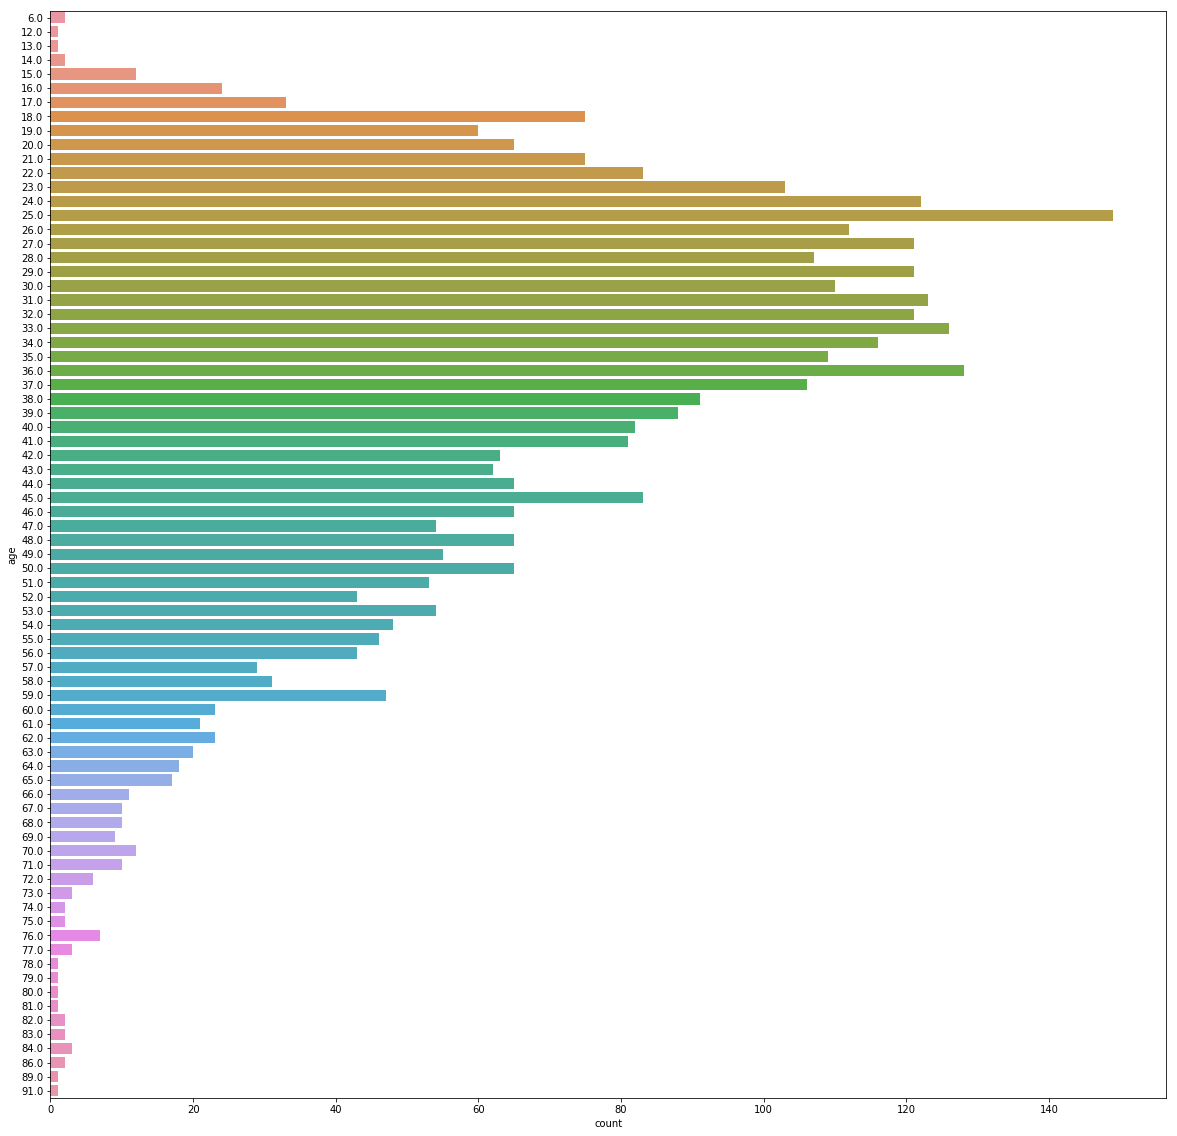

In [22]:
plt.figure(figsize=(20,20))
#sns.countplot(data=data[data['gender']=='F'],y='age')
sns.countplot(data=data,y='age')


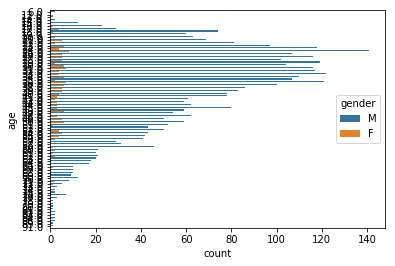

In [21]:
sns.countplot(data=data,y='age',hue='gender')


In [14]:
data['age'].value_counts().sort_index()

6.0       2
12.0      1
13.0      1
14.0      2
15.0     12
16.0     24
17.0     33
18.0     75
19.0     60
20.0     65
21.0     75
22.0     83
23.0    103
24.0    122
25.0    149
26.0    112
27.0    121
28.0    107
29.0    121
30.0    110
31.0    123
32.0    121
33.0    126
34.0    116
35.0    109
36.0    128
37.0    106
38.0     91
39.0     88
40.0     82
       ... 
58.0     31
59.0     47
60.0     23
61.0     21
62.0     23
63.0     20
64.0     18
65.0     17
66.0     11
67.0     10
68.0     10
69.0      9
70.0     12
71.0     10
72.0      6
73.0      3
74.0      2
75.0      2
76.0      7
77.0      3
78.0      1
79.0      1
80.0      1
81.0      1
82.0      2
83.0      2
84.0      3
86.0      2
89.0      1
91.0      1
Name: age, Length: 77, dtype: int64

## Mental Illnes
What does the signs_of_mental_illness field tell us?

In [15]:
data['signs_of_mental_illness'].value_counts()

False    2970
True      912
Name: signs_of_mental_illness, dtype: int64

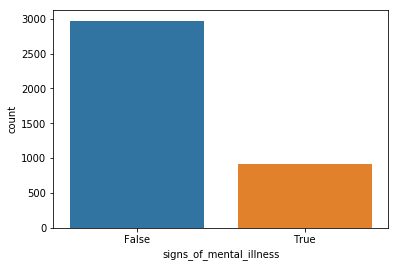

In [16]:
sns.countplot(data=data,x='signs_of_mental_illness')

Or, more easily interpretable:

([<matplotlib.patches.Wedge at 0x1a23a564a8>,
 [Text(-0.813756,0.740136,''), Text(0.813756,-0.740136,'')])

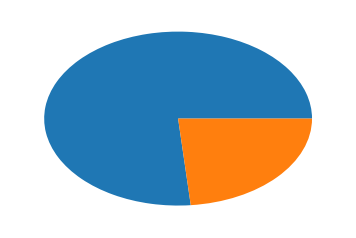

In [17]:
plt.pie(data['signs_of_mental_illness'].value_counts())
#plt.title('Relative Feature Importance')

A first observation: nearly a quarter of all shooting victims show signs of mental illness. It would be interesting to compare this to the general population. My suspicion is that signs of mental illness appear in shooting victims at a much higher rate than the population at large.